In [ ]:
import os
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading csv file
cf = 'movies.csv'
cf = pd.read_csv('movies.csv')

In [ ]:
# Missing data
for col in cf.columns:
    pct_missing = np.mean(cf[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

In [137]:
#Cleanning data
cf.drop_duplicates()
cf.drop('votes', inplace=True, axis=1)
cf.budget.round().astype('Int64')
cf.gross.round().astype('Int64')

0        46998772
1        58853106
2       538375067
3        83453539
4        39846344
          ...    
7663         <NA>
7664         <NA>
7665         <NA>
7666         <NA>
7667         <NA>
Name: gross, Length: 7668, dtype: Int64

In [118]:
cf.dropna(subset = ['gross'], inplace = True)

cf['gross'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7653    False
7655    False
7656    False
7657    False
7659    False
Name: gross, Length: 7479, dtype: bool

In [143]:
#Sorting data
cf.sort_values(by=['gross'], inplace=False, ascending=False)
cf

,name,rating,genre,year,released,score,director,writer,star,country,budget,gross,company,runtime,Year,Max
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June,gross
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July,gross
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June,gross
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July,gross
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July,gross


In [140]:
cf['Max'] = cf[['gross']].idxmax(axis=1)

In [139]:
cf['Year'] = cf['released'].astype(str).str[:4]

In [122]:
#Finding which company had the highest gross
cf.groupby(['company', 'year'])[["gross"]].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926.0
"""Weathering With You"" Film Partners",2019,193457467.0
.406 Production,1996,10580.0
1+2 Seisaku Iinkai,2000,1196218.0
10 West Studios,2010,814906.0
...,...,...
i am OTHER,2015,17986781.0
i5 Films,2001,10031529.0
iDeal Partners Film Fund,2013,506303.0


<AxesSubplot:xlabel='rating', ylabel='gross'>

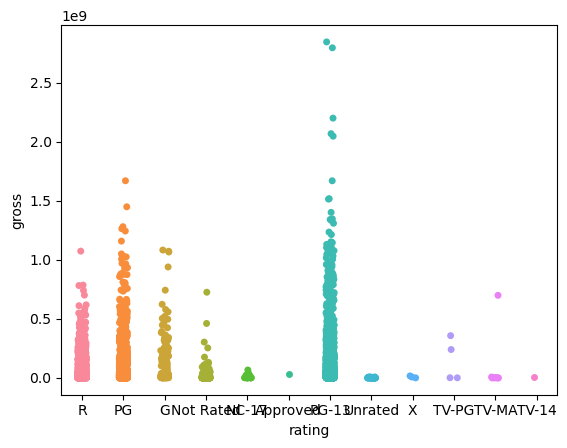

In [123]:
sns.stripplot(x="rating", y="gross", data=cf)